<a href="https://colab.research.google.com/github/faryal-art/deep-learning-projects/blob/main/MNIST_Digit_Recognition_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digit recognication data set from MNIST

  * **Deep learning project with PyTorch**

1. Download/Load data set from `torchvision.datasets`
  * Perform required operations and manuplations

2. Visualize images
3. Prepare Dataloader(Forming Batches for efficient and faster computation)
4. Create a CNN model
5. Perform Model Training and testing
6. Make predictions and Evaluation
7. Make prediction on random images(samples/data) from test data
8. Visualize prediction performed on Rabdom images from Test_dataset

## 1 DataSet( Load the torchvision.datasets.MNIST() train and test datasets.)

**Import dependiencies**

In [ ]:
#import dependiencies
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt



In [ ]:
#trainig data
train_data=datasets.MNIST(root="data",
                          train=True,
                          download=True,
                          transform=torchvision.transforms.ToTensor(),
                          target_transform=None)
test_data=datasets.MNIST(root="data",
                         train=False,
                         transform=ToTensor(),
                         target_transform=None)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
img,label=train_data[0]
img.shape,label

(torch.Size([1, 28, 28]), 5)

In [ ]:
# see label names
class_names=train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

## 1.1 Check input and output shapes of data

In [ ]:
print(f"image shape :{img.shape} ->[color_channel,height,width]")
print(f"NO of labels for images : {label}")

image shape :torch.Size([1, 28, 28]) ->[color_channel,height,width]
NO of labels for images : 5


## 2 Visulazing images

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

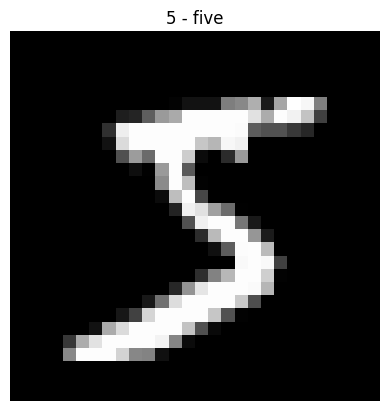

In [ ]:
#ploting firstt image from train data
plt.imshow(img.squeeze(),cmap="grey")
plt.title(class_names[label])
plt.axis(False)

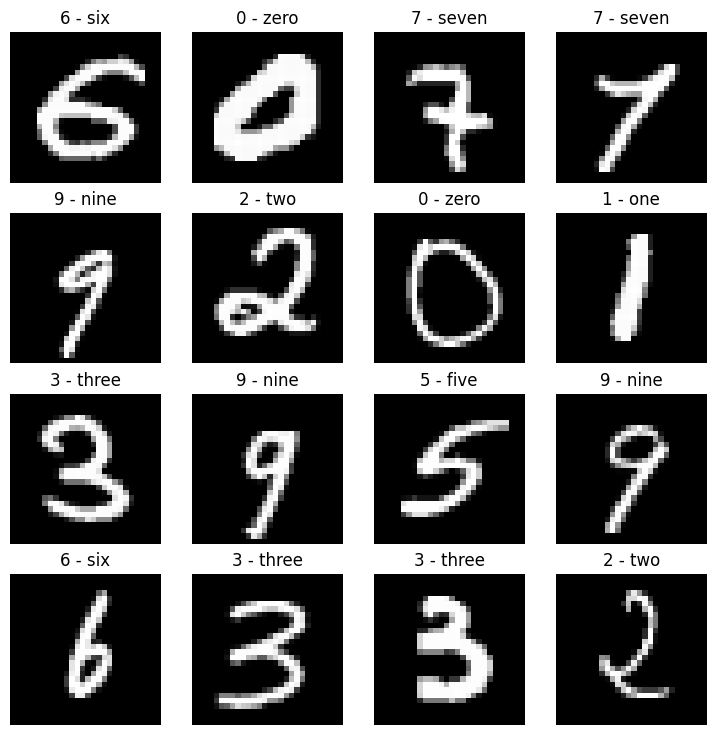

In [ ]:
# ploting random images in(9,9 format)
fig=plt.figure(figsize=(9,9))
rows=4
cols=4
for i in range (1,rows*cols+1):
  # setting randon indexes to plot random images from train_data
  random_index=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[random_index]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="grey")
  plt.title(class_names[label])
  plt.axis(False)



In [ ]:
# see details about train data
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
# see details about test data
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## 3. Prepare dataloader


In [ ]:
# Train data loader(in data loader we are dividingg our entire train and test data into batches for faster and efficient computation )
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
#shuffle=True enable the model to learn/ explore the patterns instead of remembering the same order in which images are present

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [ ]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78fb305f3210>,
 <torch.utils.data.dataloader.DataLoader at 0x78fb308c30d0>)

In [ ]:
# let's check some detail about dataloaders we have created
print(f"length of train_dataloader: {len(train_dataloader)} , Batch size: {BATCH_SIZE}")
print(f"lenght of test_dataloader: {len(test_dataloader)}, Batch size: {BATCH_SIZE}")


length of train_dataloader: 1875 , Batch size: 32
lenght of test_dataloader: 313, Batch size: 32


In [ ]:
# what is inside dataloader
train_feature_batch,train_label_batch=next(iter(train_dataloader))

print(f"shape of train_feature_batch: {train_feature_batch.shape}")
print(f"shape of train_label_batch: {train_label_batch.shape}")


shape of train_feature_batch: torch.Size([32, 1, 28, 28])
shape of train_label_batch: torch.Size([32])


## 4. Model: creating a CNN model

---



In [ ]:
class DigitCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_block1=nn.Sequential(
        nn.Conv2d(in_channels=1,
                  out_channels=32,
                  kernel_size=3,
                  stride=1,
                  padding =1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=32,
                  out_channels=32,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.conv_block2=nn.Sequential(
        nn.Conv2d(in_channels=32,
                  out_channels=32,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32,
                  out_channels=32,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2))
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=32*7*7,
                  out_features=10)


    )
  #over write forward function
  def forward(self,x):
    x=self.conv_block1(x)
    #print(f"output shape of conv block 1 : {x.shape}")
    x=self.conv_block2(x)
    #print(f" output shape of conv block 1:  { x.shape}" )
    x=self.classifier(x)
    #print(f"ooutput shape of classifier : {x.shape}")
    return x




In [ ]:
model_0=DigitCNN()
model_0

DigitCNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [ ]:
# device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 5 Training and testing model

### 5.1 Downloading Helper Functions Script

In [ ]:
import requests
from pathlib import Path

# download helper function from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functios.py already exists")
else:
  print("downloading helper_function.py file")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)




helper_functios.py already exists


### 5.2  Setting up loos , optimizer and accuracy function

In [ ]:
#setup loss and optimizer
from helper_functions import accuracy_fn

# setuo loss function and optmizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

### 5.3 Setting up Train function

In [ ]:
#  setting train step ()function
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """ Performing tarining with model trying to learn on data_loader """


  train_loss ,train_acc=0,0

  #put model in training mode
  model.train()

  # aloop to loop through data
  for batch, (X,y) in enumerate(data_loader):

    #put data on target device
    X,y =X.to(device),y.to(device)



    # forware pas
    train_preds=model(X)

    #loss calculation
    loss=loss_fn(train_preds,y)
    train_loss += loss

    #accuracy calculation
    acc=accuracy_fn(y,train_preds.argmax(dim=1))
    train_acc  += acc

    #set optimizer
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()

  #divide tota train loss and accuracy to the length of data loader to ge average train loss and acc per batch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  # print what is happening
  print(f" Train_loss: {train_loss:.5f} , Train_acc:  {train_acc:.5f}%")



### 5.3 Set up Test function

In [ ]:
# setting test step () function .
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device=device):

  """ Performing a testing lood step on model going over data_loader"""
  test_loss,test_acc=0,0
  model.eval()

  # turn on inference mode(inference_mode is an other wotd for predictions with in inferrence mode cotext ,anager  )
  with torch.inference_mode():
    for X,y in data_loader:

      #set data to target device
      X,y= X.to(device),y.to(device)

      #forward pass(output raw logits)
      test_preds=model(X)

      #calculate loss and accuracy
      test_loss += loss_fn(test_preds,y).item()
      test_acc += accuracy_fn(y, test_preds.argmax(dim=1)) # convet logits ->prediction labels

  # adjust metrics - moved outside the inference_mode block
    test_loss =test_loss/len(data_loader)
    test_acc = test_acc/len(data_loader)

  #print  what is happened
  print(f"Test loss: { test_loss:.5f}, Test_accuracy: {test_acc:.5f}")


In [ ]:
model_0

DigitCNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

## 5.4 Performing Training and Testing on Mdel

In [ ]:
# passing through train_step () and test_step()

epochs=3
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n--------")
  train_step(
      model_0,
      train_dataloader,
      loss_fn,
      optimizer,
      accuracy_fn,
      device)

  test_step(
      model_0,
      test_dataloader,
      loss_fn,
      accuracy_fn,
      device)




Epoch: 0
--------
 Train_loss: 0.20709 , Train_acc:  93.33667%
Test loss: 0.06800, Test_accuracy: 97.70367
Epoch: 1
--------
 Train_loss: 0.05272 , Train_acc:  98.37500%
Test loss: 0.03987, Test_accuracy: 98.67212
Epoch: 2
--------
 Train_loss: 0.03898 , Train_acc:  98.78500%
Test loss: 0.03442, Test_accuracy: 98.82188


## 6 Making predictions and Evaluation


In [ ]:
loss,acc=0,0
model_0.eval()
with torch.inference_mode():
  for X,y in test_dataloader:
    # put data on target device
    X,y=X.to(device),y.to(device)

    #forward pass
    test_preds=model_0(X)

    #calculate the looss and accuracy
    loss+=loss_fn(test_preds,y)
    acc+=accuracy_fn(y,test_preds.argmax(dim=1))

  loss = loss/len(test_dataloader)
  acc= acc/len(test_dataloader)
  print(f"loss: {loss}, accuarcy: {acc}")




loss: 0.03442104160785675, accuarcy: 98.82188498402556


### 7 Make prediction  on random images from test data

### 7.1 Setting a loop to randomly select 15 images from Test data

In [134]:
import random
test_samples=[]
test_labels=[]

# loop to randomly select 15 samples from test data set for prediction in future
for sample,label in random.sample(list(test_data),k=15):
  test_samples.append(sample) # 15 random  sample from test data
  test_labels.append(label)   # labels for 15 random samples

# view any random sample
test_samples[9].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, '1 - one')

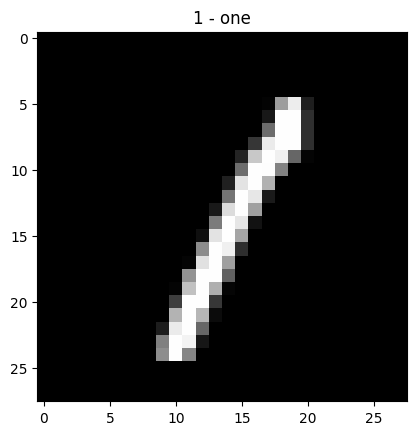

In [123]:
# check if it is working well

plt.imshow(test_samples[9].squeeze(),cmap="grey")
plt.title(class_names[test_labels[9]])


### 7.2 Making predictions on random sample

#### Function to make predictions

In [135]:
def predictions(model: torch.nn.Module,
                data: list,
                device: torch.device=device):
  pred_probs_list=[]  # initilize empty list
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add batch dimension and put it on target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #forward pass( will output models raw logits )
      pred_logits=model(sample)

      #get predictions probabilities( from logits to -> probabilities )
      # in case of multi class classification problem we are using softmax activation function
      pred_probs_tensor=torch.softmax(pred_logits.squeeze() ,dim=0) # Renamed to avoid conflict

      #get preds_probs off the GPU for further calculations
      pred_probs_list.append(pred_probs_tensor.cpu()) # Append the tensor to the list

      #stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs_list) # Stack the list into a tensor



### Make predictions

In [136]:
# Make prediction
pred=predictions(model_0,
                 test_samples)

#it will output probabilities
pred[1]



tensor([4.3628e-12, 3.7421e-08, 4.8375e-09, 2.7633e-05, 1.1263e-10, 1.3464e-09,
        1.6433e-16, 9.9997e-01, 9.6925e-11, 6.4786e-07])

In [137]:
pred_labels=torch.argmax(pred,dim=1)
print(f"Labels that our model have predicted  :\n { pred_labels}")

Labels that our model have predicted  :
 tensor([7, 7, 7, 5, 2, 1, 0, 5, 3, 1, 5, 6, 3, 4, 8])


In [138]:
print(f" Actual labels: \n { test_labels} ")

 Actual labels: 
 [7, 7, 7, 5, 2, 1, 0, 5, 3, 1, 5, 6, 3, 4, 8] 


# Visualization

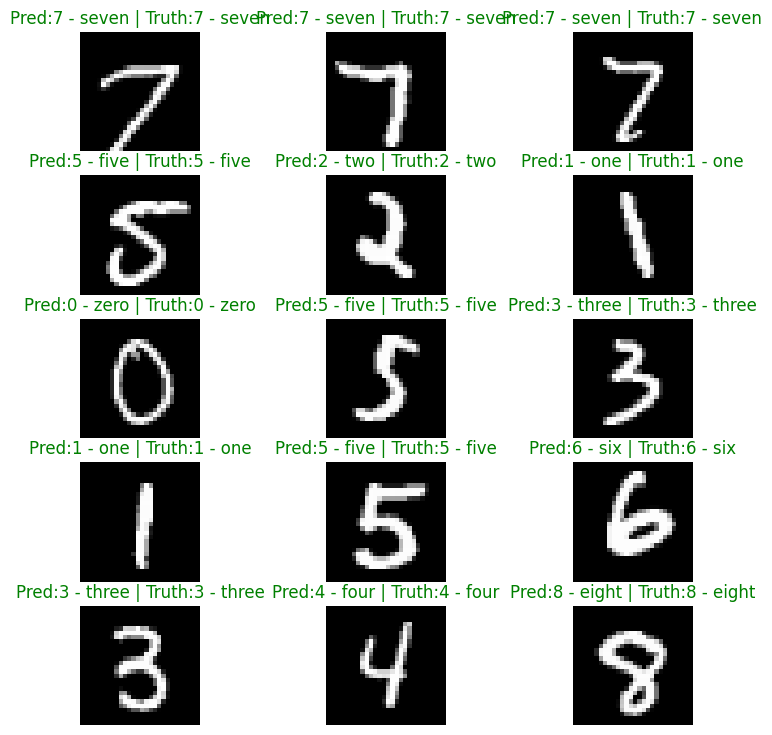

In [139]:
plt.figure( figsize=(9,9))
rows=5
cols=3

for i,sample in enumerate(test_samples):
  #create subplot
  plt.subplot(rows,cols,i+1)

  #plot target image
  plt.imshow(sample.squeeze(),cmap="grey")

  #find prediction label in text
  pred_label=class_names[pred_labels[i]]

  #get truth/actual label
  truth_label=class_names[test_labels[i]]

  # create title
  tittle=f"Pred:{pred_label} | Truth:{truth_label}"

  # check equality
  if pred_label==truth_label:
    plt.title(tittle,color="green")
  else:
    plt.title(tittle,color="red")

  plt.axis(False);





